# Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from Kaggle, and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from Kaggle
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.

   - Remember that for multi-class classification you need a softamx activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Trian your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaning the activation functions on the hidden layers, etc.
8. Load in Kaggle's `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for _at least_ two of the three "configurations":

1. Using a `tensorflow` network
2. Using a `keras` "sequential" network
3. Using a `keras` convolutional network
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

In [5]:
data=pd.read_csv("train.csv")

In [8]:
target='label'
y=data[target]
X=data.drop(target, axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=117)

In [12]:
X_train.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
28097       0       0       0       0       0       0       0       0       0   
26506       0       0       0       0       0       0       0       0       0   
5049        0       0       0       0       0       0       0       0       0   
12423       0       0       0       0       0       0       0       0       0   
17251       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
28097       0  ...         0         0         0         0         0   
26506       0  ...         0         0         0         0         0   
5049        0  ...         0         0         0         0         0   
12423       0  ...         0         0         0         0         0   
17251       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
28097         0         0         0         0         0  
26506         0         0         0         0         0  
5049          0         0         0         0         0  
12423         0         0         0         0         0  
17251         0         0         0         0         0  

[5 rows x 784 columns]

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [24]:
lb=LabelBinarizer()

y_train=lb.fit_transform(y_train)
y_test=lb.transform(y_test)

In [67]:
lb.inverse_transform(y_train[[0]])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [159]:
type(X_train)

numpy.ndarray

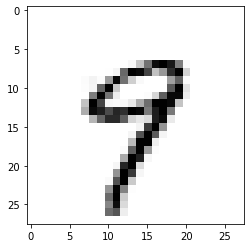

In [41]:
plt.imshow(X_train[0].reshape(28,28), cmap="Greys")

<h1> Sequential Dense Model</h1>

In [112]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, input_shape=(28, 28), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [113]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [114]:
history = model.fit( X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
            
                    epochs=15,
                    verbose=1)

Train on 35700 samples, validate on 6300 samples
Epoch 1/15
35700/35700 [==============================] - 1s 24us/sample - loss: 0.5825 - accuracy: 0.8400 - val_loss: 0.2702 - val_accuracy: 0.9241
Epoch 2/15
35700/35700 [==============================] - 0s 13us/sample - loss: 0.2152 - accuracy: 0.9400 - val_loss: 0.2013 - val_accuracy: 0.9424
Epoch 3/15
35700/35700 [==============================] - 0s 12us/sample - loss: 0.1605 - accuracy: 0.9542 - val_loss: 0.1657 - val_accuracy: 0.9514
Epoch 4/15
35700/35700 [==============================] - 0s 14us/sample - loss: 0.1248 - accuracy: 0.9645 - val_loss: 0.1477 - val_accuracy: 0.9587
Epoch 5/15
35700/35700 [==============================] - 1s 15us/sample - loss: 0.1018 - accuracy: 0.9711 - val_loss: 0.1368 - val_accuracy: 0.9608
Epoch 6/15
35700/35700 [==============================] - 0s 13us/sample - loss: 0.0862 - accuracy: 0.9756 - val_loss: 0.1229 - val_accuracy: 0.9644
Epoch 7/15
35700/35700 [==============================] -

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  4128      
_________________________________________________________________
dense_2 (Dense)              multiple                  330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


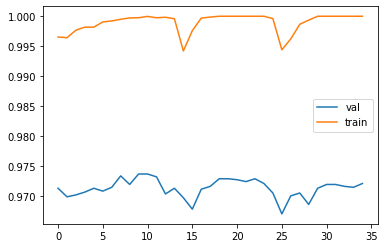

In [116]:
plt.plot(history.history['val_accuracy'], label='val')
plt.plot(history.history['accuracy'], label='train')
plt.legend()

In [115]:
history = model.fit( X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=35,
                    verbose=1)

Train on 35700 samples, validate on 6300 samples
Epoch 1/35
35700/35700 [==============================] - 1s 14us/sample - loss: 0.0170 - accuracy: 0.9965 - val_loss: 0.1154 - val_accuracy: 0.9713
Epoch 2/35
35700/35700 [==============================] - 1s 17us/sample - loss: 0.0167 - accuracy: 0.9964 - val_loss: 0.1173 - val_accuracy: 0.9698
Epoch 3/35
35700/35700 [==============================] - 1s 28us/sample - loss: 0.0133 - accuracy: 0.9977 - val_loss: 0.1164 - val_accuracy: 0.9702
Epoch 4/35
35700/35700 [==============================] - 1s 31us/sample - loss: 0.0114 - accuracy: 0.9982 - val_loss: 0.1165 - val_accuracy: 0.9706
Epoch 5/35
35700/35700 [==============================] - 1s 19us/sample - loss: 0.0102 - accuracy: 0.9982 - val_loss: 0.1183 - val_accuracy: 0.9713
Epoch 6/35
35700/35700 [==============================] - 1s 19us/sample - loss: 0.0078 - accuracy: 0.9990 - val_loss: 0.1231 - val_accuracy: 0.9708
Epoch 7/35
35700/35700 [==============================] -

<h1> Dropout model</h1>

In [106]:
model_dropout = Sequential()
model_dropout.add(Flatten())
model_dropout.add(Dense(128, input_shape=(28, 28), activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(32, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(16, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(10, activation='softmax'))

In [107]:
model_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [108]:
hist2 = model_dropout.fit( X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=15,
                    verbose=0)

In [109]:
model_dropout.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  100480    
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_9 (Dense)              multiple                  4128      
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  528       
_________________________________________________________________
dropout_4 (Dropout)          multiple                 

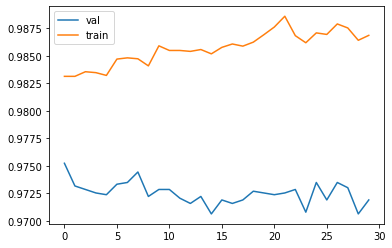

In [149]:
plt.plot(hist2.history['val_accuracy'], label='val')
plt.plot(hist2.history['accuracy'], label='train')
plt.legend()

In [148]:
hist2 = model_dropout.fit( X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    verbose=1)

Train on 35700 samples, validate on 6300 samples
Epoch 1/30
35700/35700 [==============================] - 1s 15us/sample - loss: 0.0613 - accuracy: 0.9831 - val_loss: 0.1392 - val_accuracy: 0.9752s - loss: 0.0626 - accuracy: 0.98 - ETA: 0s - loss: 0.0619 - accuracy: 
Epoch 2/30
35700/35700 [==============================] - 1s 17us/sample - loss: 0.0565 - accuracy: 0.9831 - val_loss: 0.1406 - val_accuracy: 0.9732
Epoch 3/30
35700/35700 [==============================] - 0s 14us/sample - loss: 0.0571 - accuracy: 0.9836 - val_loss: 0.1324 - val_accuracy: 0.9729
Epoch 4/30
35700/35700 [==============================] - 0s 14us/sample - loss: 0.0579 - accuracy: 0.9835 - val_loss: 0.1355 - val_accuracy: 0.9725
Epoch 5/30
35700/35700 [==============================] - 1s 14us/sample - loss: 0.0571 - accuracy: 0.9832 - val_loss: 0.1529 - val_accuracy: 0.9724
Epoch 6/30
35700/35700 [==============================] - 0s 13us/sample - loss: 0.0528 - accuracy: 0.9847 - val_loss: 0.1417 - val_acc

<h1> CNN</h1>

In [123]:
cnn_model = Sequential()

In [124]:
cnn_model.add(Input(shape=(28, 28, 1)))
cnn_model.add(Conv2D(filters = 6,            
                     kernel_size = 3,       
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(16,
                     kernel_size=3,
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(len(lb.classes_), activation='softmax'))

In [125]:
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               51328     
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [126]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10)

hist3 = cnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=1000,
    batch_size=None,
    callbacks=[early_stop]
)

Train on 35700 samples, validate on 6300 samples
Epoch 1/1000
35700/35700 [==============================] - 10s 273us/sample - loss: 0.0436 - accuracy: 0.9849 - val_loss: 0.0194 - val_accuracy: 0.9933
Epoch 2/1000
35700/35700 [==============================] - 9s 260us/sample - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0143 - val_accuracy: 0.9950
Epoch 3/1000
35700/35700 [==============================] - 10s 289us/sample - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0129 - val_accuracy: 0.9957
Epoch 4/1000
35700/35700 [==============================] - 10s 288us/sample - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0113 - val_accuracy: 0.9967
Epoch 5/1000
35700/35700 [==============================] - 9s 240us/sample - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0104 - val_accuracy: 0.9968
Epoch 6/1000
35700/35700 [==============================] - 9s 244us/sample - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0090 - val_accuracy: 0.9971
Epoch 7/1000
35700/35700 [==========

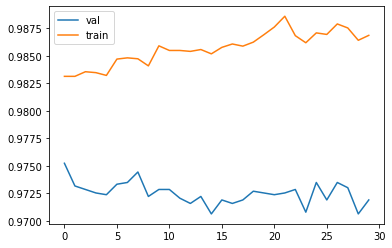

In [151]:
plt.plot(hist2.history['val_accuracy'], label='val')
plt.plot(hist2.history['accuracy'], label='train')
plt.legend()

In [150]:
hist3 = cnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=None,
    
)

Train on 35700 samples, validate on 6300 samples
Epoch 1/15
35700/35700 [==============================] - 10s 283us/sample - loss: 1.5122e-04 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9976
Epoch 2/15
35700/35700 [==============================] - 10s 279us/sample - loss: 9.1618e-04 - accuracy: 0.9996 - val_loss: 0.0195 - val_accuracy: 0.9971
Epoch 3/15
35700/35700 [==============================] - 10s 281us/sample - loss: 4.4778e-04 - accuracy: 0.9998 - val_loss: 0.0172 - val_accuracy: 0.9972
Epoch 4/15
35700/35700 [==============================] - 10s 288us/sample - loss: 6.1725e-04 - accuracy: 0.9998 - val_loss: 0.0180 - val_accuracy: 0.9972
Epoch 5/15
35700/35700 [==============================] - 10s 287us/sample - loss: 2.4593e-04 - accuracy: 0.9999 - val_loss: 0.0162 - val_accuracy: 0.9975
Epoch 6/15
35700/35700 [==============================] - 10s 283us/sample - loss: 6.3994e-04 - accuracy: 0.9998 - val_loss: 0.0203 - val_accuracy: 0.9969
Epoch 7/15
35700/3570

In [130]:
test_data=pd.read_csv("test.csv")

In [131]:
test_data=scaler.transform(test_data)

In [132]:
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

In [142]:
y_hat=cnn_model.predict(test_data)

In [134]:
data=pd.read_csv("train.csv")

In [135]:
new=data['label']

In [136]:
new=lb.fit_transform(new)

In [163]:
res=pd.DataFrame(lb.inverse_transform(np.array(y_hat)))

In [169]:
res=res.reset_index()

In [170]:

res.columns=['ImageId',"Label"]

In [176]:
cnn_model.predict_proba(test_data)

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [173]:
res['ImageId']=res['ImageId']+1

In [174]:
res

ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]

In [172]:
res.to_csv("res.csv", header=True, index=False)